In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import scipy.stats as st
import seaborn as sns

In [6]:
folder = "../final_test_jsons"
file_infos = [
    ("20230627_final_sim_pre_down_unet_2d.json","unet_2d_sim"),
    ("20230627_ft_sim_final_pre_down_unet_2d_split_1.json","unet_2d_ft"),
    ("20230628_final_pre_down_unet_2d_split_1.json","unet_2d_invivo"),
    ("20230629_final_pre_down_unet_2d_split_1_onoff.json","unet_2d_invivo_onoff"),
    ("20230629_final_sim_pre_down_unet_2d_onoff.json","unet_2d_sim_onoff"),
    ("20230629_ft_sim_final_pre_down_unet_2d_split_1_onoff.json","unet_2d_ft_onoff"),
    ("20230629_unet_1d_diff.json","unet_1d_sim"),
    ("20230629_ft_sim_final_")
]

In [7]:
dfs=[]
for file_info in file_infos:
    with open(f"{folder}/{file_info[0]}") as f:
        file_json = json.load(f)
        row_df = pd.DataFrame({
            "model":file_info[1],
            "scan_n":np.arange(1,37),
            "mse":file_json["metrics"]["mse"],
            "gaba_snr":file_json["metrics"]["gaba_snr"],
            "shape_score":file_json["metrics"]["shape_score"]
        })
        dfs.append(row_df)

df = pd.concat(dfs,sort=False)


In [8]:
df.groupby("model").agg({"mse":"mean","gaba_snr":"mean","shape_score":"mean"})

,mse,gaba_snr,shape_score
model,,,
unet_2d_ft,0.019527,NaN,0.981676
unet_2d_ft_onoff,0.056630,NaN,0.889453
unet_2d_invivo,0.020998,42.032258,0.981868
unet_2d_invivo_onoff,0.037407,NaN,0.938531
unet_2d_sim,0.305044,6.848261,0.103774
unet_2d_sim_onoff,4.704780,126.797930,0.575780


In [7]:
### quantification analysis
q_folder = "../final_quantification"
q_file_infos = [
    ("20230627_ft_sim_final_pre_down_unet_2d_split_1.pth.csv","unet_2d_ft"),
    ("20230628_final_pre_down_unet_2d_split_1.pth.csv","unet_2d_invivo"),
    ("20230629_final_pre_down_unet_2d_split_1_onoff.pth.csv","unet_2d_invivo_onoff"),
    ("20230629_ft_sim_final_pre_down_unet_2d_split_1_onoff.pth.csv","unet_2d_ft_onoff"),
]

dfs=[]
for q_file_info in q_file_infos:
    i_df = pd.read_csv(f"{q_folder}/{q_file_info[0]}")
    i_df["model"]=q_file_info[1]
    dfs.append(i_df)

df = pd.concat(dfs,sort=False)

In [9]:
print(df.groupby("model").agg({"gaba_fit_error":"mean"}))
print(df.groupby("model").agg({"gaba_fit_error":"std"}))
print(df.groupby("model").agg({"gaba_fit_error":"median"}))

                      gaba_fit_error
model                               
unet_2d_ft                  4.353714
unet_2d_ft_onoff            1.556982
unet_2d_invivo              4.807314
unet_2d_invivo_onoff        4.562827
                      gaba_fit_error
model                               
unet_2d_ft                  2.983080
unet_2d_ft_onoff           10.609316
unet_2d_invivo              4.124764
unet_2d_invivo_onoff        2.355621
                      gaba_fit_error
model                               
unet_2d_ft                  3.395728
unet_2d_ft_onoff            3.029113
unet_2d_invivo              3.343816
unet_2d_invivo_onoff        3.770344


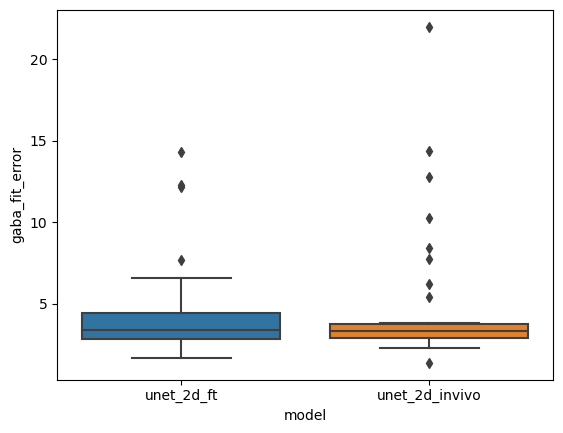

In [17]:
sns.boxplot(data=df,x="model",y="gaba_fit_error")
plt.show()

In [15]:
gaba_fit_errors=[]
for q_file_info in q_file_infos:
    i_df = pd.read_csv(f"{q_folder}/{q_file_info[0]}")
    gaba_fit_errors.append(i_df["gaba_fit_error"].values)

st.wilcoxon(gaba_fit_errors[0],gaba_fit_errors[1])

WilcoxonResult(statistic=296.0, pvalue=0.5706635903334245)